# IPL Analysis (Season 2007-18)

## Importing Libraries

In [631]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['font.size'] = 14

In [786]:
import jovian

## Data Cleaning and Rearrangement

In [51]:
matches_df = pd.read_csv('matches.csv')

In [9]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

"Umpire 3" has no data and hence is of no use. Let's begin with dropping this column

In [52]:
matches_df.drop(['umpire3'],axis=1, inplace=True)

### Dealing with missing data:

In [53]:
#Finding the colums with mising data
matches_df.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

In [54]:
#Let's simply replace the null city and umpires' field with 'Unknown'
matches_df[['city', 'umpire1', 'umpire2']] = matches_df[['city', 'umpire1', 'umpire2']].fillna('Unknown')

In [57]:
matches_df.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            0
umpire2            0
dtype: int64

**Is there any relation between the null values of 'winner' and 'player_of_match'?**

In [63]:
matches_df[matches_df['winner'].isnull() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan


*It can be clearly seen that when the match result was 'no result', the fields 'winner' and 'player_of_match' is null*

In [67]:
#Replacing the null fiels with value "None"
matches_df[['winner', 'player_of_match']] = matches_df[['winner', 'player_of_match']].fillna('None')

In [68]:
matches_df.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

**Removing redundant team names**

In [69]:
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

Over the seasons, teams have changed their names, Hence renaming the team names (based on their cities) will help us drive better information from the data.

In [70]:
#Renaming Pune's teams
matches_df = matches_df.replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
matches_df = matches_df.replace('Pune Warriors', 'Rising Pune Supergiants')
#Renaming Hyderabad's team
matches_df = matches_df.replace('Deccan Chargers','Sunrisers Hyderabad')

In [73]:
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala'],
      dtype=object)

## Data Analysis

Lets' start with analysing the data having done with cleaning and arranging it.

**Q. In which season were most number of matches played?**

In [719]:
most_matches_in_season = matches_df.groupby('season').size().reset_index()
most_matches_in_season.columns = ['Season', 'Number of Matches']
most_matches_in_season

,Season,Number of Matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


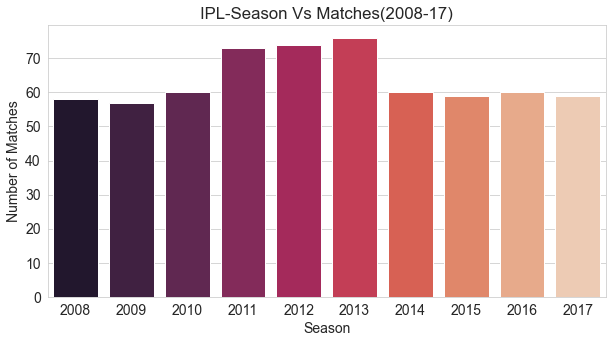

In [785]:
plt.figure(figsize = (10,5))
plt.title('IPL-Season Vs Matches(2008-17)')
sns.barplot(data = most_matches_in_season,
            x = 'Season',
            y = 'Number of Matches',
            palette='rocket');

Most matches were played in the Season 2013 and just a few less matches were played in seasons 2012 and 2011.

**Q. Which city has hosted most number of matches?**

In [775]:
cities = matches_df['city'].value_counts().head(10).reset_index()
cities.columns = ['Host', 'Matches']

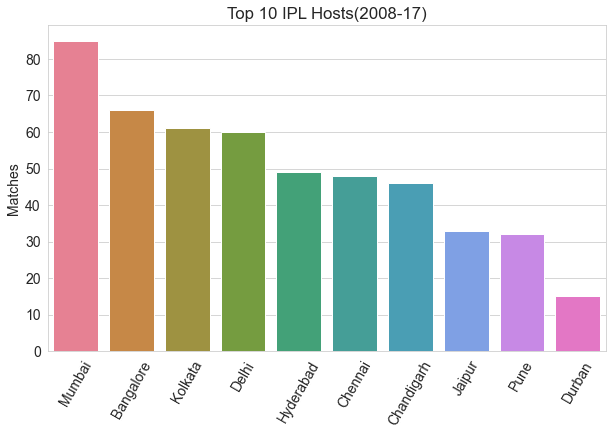

In [802]:
plt.figure(figsize = (10,6))
plt.title('Top 10 IPL Hosts(2008-17)')
plt.xticks(rotation = 60)
plot = sns.barplot(data = cities,
            x = 'Host',
            y = 'Matches',
            palette='husl');
plot.set(xlabel=None);

It can be clearly seen that Mumbai has hosted most number of IPL matches.

**Q. Which Umpire is the most trusted in IPL?**

In [799]:
most_trusted_umpires = pd.concat([matches_df['umpire1'], matches_df['umpire2']]).value_counts().head(10)

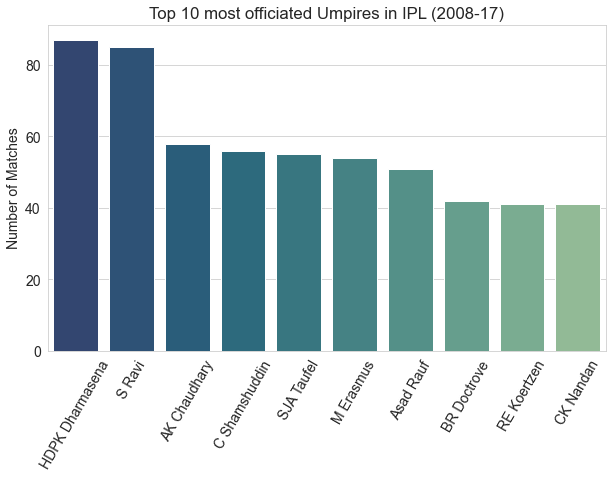

In [766]:
plt.figure(figsize = (10,6))
plt.title("Top 10 most officiated Umpires in IPL (2008-17)")
plt.ylabel("Number of Matches")
plt.xticks(rotation = 60)
sns.barplot(x = most_trusted_umpires.index,
            y= most_trusted_umpires,
            palette='crest_r');

As the chart depicts, "HDPK Dharmasena" and "S Ravi" have been the most trusted Umpires in IPL from season 2008-17 based on the number of matches they have been officiated where Dharmasena tops the list.

**Q: Which team performed best season-wise?**

In [797]:
def max_wins(df):
    return df['winner'].value_counts().idxmax()
    
seasonal_winners = matches_df.groupby('season').apply(max_wins).to_frame().reset_index()
# seasonal_winners.rename(columns={'season':'Season',"Most wins": 0}, inplace=True)
seasonal_winners.columns = ['Season', 'Team with most wins']

In [436]:
print("The teams which performed the best season-wise are:")
seasonal_winners

The teams which performed the best season-wise are:


,Season,Team with most wins
0,2008,Rajasthan Royals
1,2009,Delhi Daredevils
2,2010,Mumbai Indians
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kings XI Punjab
7,2015,Chennai Super Kings
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


**Q.  Which team has won the most matches which were hit by rain?**

In [757]:
matches_hit_by_rain = matches_df[matches_df['dl_applied'] == 1]['winner'].value_counts().reset_index()
matches_hit_by_rain.columns = ['Team', 'Wins']
matches_hit_by_rain

,Team,Wins
0,Kolkata Knight Riders,4
1,Royal Challengers Bangalore,3
2,Rising Pune Supergiants,2
3,Chennai Super Kings,2
4,Sunrisers Hyderabad,2
5,Delhi Daredevils,1
6,Kings XI Punjab,1
7,Kochi Tuskers Kerala,1


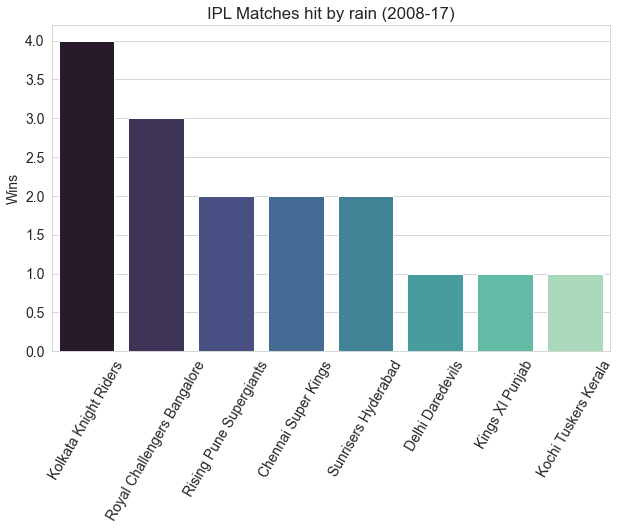

In [801]:
plt.figure(figsize = (10,6))
plt.title("IPL Matches hit by rain (2008-17)")
plt.xticks(rotation = 60)
plot = sns.barplot(data= matches_hit_by_rain, 
            x = 'Team',
            y= 'Wins',
            palette='mako');
plot.set(xlabel=None);

Kolkata Knight Riders have won the most number of matches hit by rain.

**Q. Which team has won with the biggest run margin?**

In [735]:
run_margin = matches_df[['winner', 'win_by_runs']].sort_values(by='win_by_runs', ascending=False).head(10)
run_margin

,winner,win_by_runs
43,Mumbai Indians,146
619,Royal Challengers Bangalore,144
59,Kolkata Knight Riders,140
556,Royal Challengers Bangalore,138
410,Royal Challengers Bangalore,130
295,Kings XI Punjab,111
114,Rajasthan Royals,105
182,Mumbai Indians,98
8,Delhi Daredevils,97
541,Chennai Super Kings,97


Mumbai Indians have won by the biggest run margin between season 2008-17 by 146 runs while Royal Challengers Bangalore remains on the 2nd spot in this list winning with a difference of 144 runs.

**Q. Which team has the highest win percentage despite losing toss?**

In [779]:
def win_percentage(df):
    return round(df['Wins'] / df['Total Matches'] , 4) * 100

In [780]:
#filtering records of the teams which lost toss but won matches
lost_toss_result = matches_df[(matches_df['winner'] != matches_df['toss_winner'])]
matches_played_losing_toss = pd.concat([lost_toss_result['team1'], lost_toss_result['team2']])

#filtering team names, total matches and total wins
matches_played_losing_toss = matches_played_losing_toss.value_counts().reset_index()
matches_played_losing_toss.columns = ['Team Name','Total Matches']
matches_played_losing_toss['Wins'] = lost_toss_result['winner'].value_counts().reset_index()['winner']

# calculating win percentage
matches_played_losing_toss['Win Percentage'] = win_percentage(matches_played_losing_toss)
matches_played_losing_toss

,Team Name,Total Matches,Wins,Win Percentage
0,Kings XI Punjab,82,44,53.66
1,Mumbai Indians,81,42,51.85
2,Sunrisers Hyderabad,77,38,49.35
3,Royal Challengers Bangalore,74,37,50.00
4,Delhi Daredevils,69,35,50.72
5,Kolkata Knight Riders,67,33,49.25
6,Chennai Super Kings,61,29,47.54
7,Rajasthan Royals,58,29,50.00
8,Rising Pune Supergiants,39,16,41.03
9,Gujarat Lions,8,3,37.50


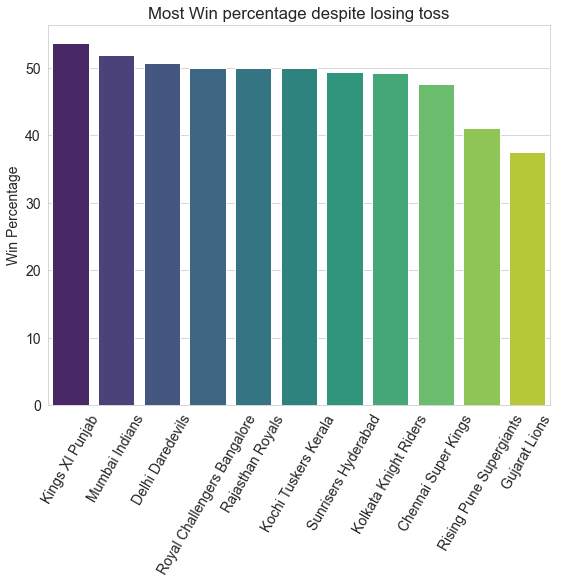

In [805]:
matches_played_losing_toss.sort_values(by= 'Win Percentage', ascending=False, inplace=True)
plt.figure(figsize= (9,7))
plt.title('Most Win percentage despite losing toss')
plt.xticks(rotation = 60)
plot = sns.barplot(data = matches_played_losing_toss, 
            x = 'Team Name', 
            y = 'Win Percentage', palette = 'viridis');
plot.set(xlabel = None);

Kings XI Punjab has the highest winning percentage despite losing toss while Mumbai Indians ranks 2nd with a minimal difference.

**Q. Which team is the Greatest of All Time (GOAT)?**

In [781]:
total_matches = pd.concat([matches_df['team1'], matches_df['team2']]).value_counts().reset_index()
total_matches.columns = ['Team Name', "Total Matches"]

total_matches['Wins'] = lost_toss_result['winner'].value_counts().reset_index()['winner']

# calculating win percentage
total_matches['Win Percentage'] = win_percentage(total_matches)
total_matches.sort_values(by='Win Percentage', ascending=False)

,Team Name,Total Matches,Wins,Win Percentage
0,Mumbai Indians,157,44,28.03
1,Royal Challengers Bangalore,152,42,27.63
2,Sunrisers Hyderabad,151,38,25.17
3,Kolkata Knight Riders,148,37,25.00
7,Rajasthan Royals,118,29,24.58
4,Kings XI Punjab,148,35,23.65
5,Delhi Daredevils,147,33,22.45
6,Chennai Super Kings,131,29,22.14
10,Kochi Tuskers Kerala,14,3,21.43
8,Rising Pune Supergiants,76,16,21.05


Mumbai Indians tops the table with a win percentage of 28.03 and Royal Challengers Bangalore just behind with 27.63 win percentage.

Mumbai Indians can be clearly referred to as the Greatest of All Times.

## Conclusion:

- Mumbai Indians have the highest winning percentage amongst all the teams and also have a great winning percentage despite losing toss.
- It has topped the table with most wins in a season chart in the years 2010, 2013 and 2017. 
- Hence it can be referred to as the Greatest of All Time.
- We now have many more insights of the data such as most trusted umpires are, the city which has hosted most IPL matches, seasonal top performers, etc.

**Future work:**
- There is a lot which can be derived through this data and hence many more questions can be answered.

**Dataset Source:**
https://www.kaggle.com/manasgarg/ipl


In [807]:
jovian.commit(project='ipl-data-analysis', environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mayurjajoomj/ipl-data-analysis" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/mayurjajoomj/ipl-data-analysis


'https://jovian.ai/mayurjajoomj/ipl-data-analysis'